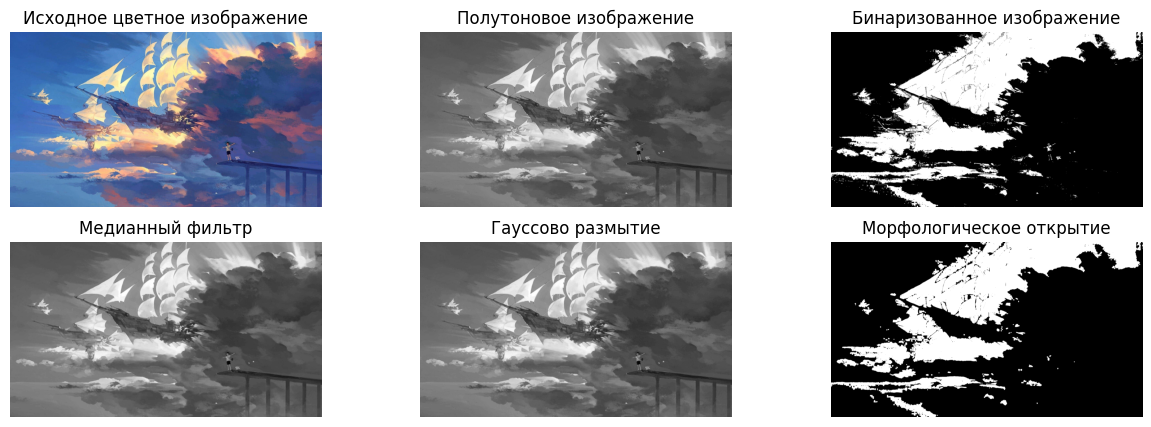

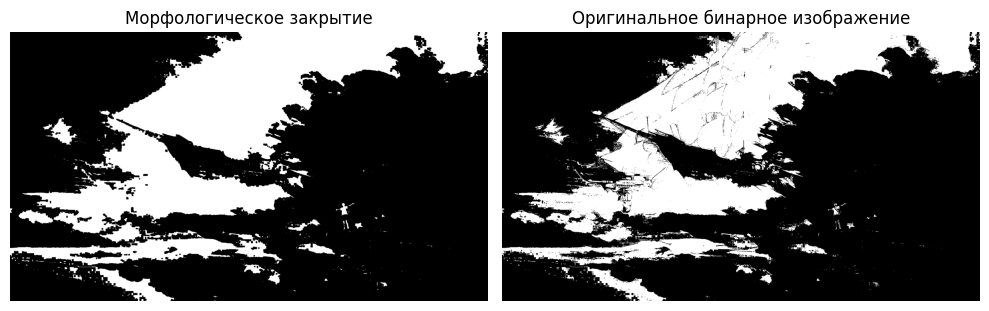

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка цветного изображения
image_path = '../images/IMG_20130818_081052.jpg'
color_image = cv2.imread(image_path)

# Проверка успешности загрузки изображения
if color_image is None:
    raise FileNotFoundError(f"Изображение по пути {image_path} не найдено.")

# Конвертация цветной модели BGR в RGB для корректного отображения
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Преобразование цветного изображения в полутоновое (оттенки серого)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Применение бинаризации с использованием порога (например, 127)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Визуализация исходных изображений
plt.figure(figsize=(15, 5))

# Отображение исходного цветного изображения
plt.subplot(2, 3, 1)
plt.imshow(color_image_rgb)
plt.title('Исходное цветное изображение')
plt.axis('off')

# Отображение полутонового изображения
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Полутоновое изображение')
plt.axis('off')

# Отображение бинаризованного изображения
plt.subplot(2, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Бинаризованное изображение')
plt.axis('off')

# Устранение шумов на полутоновом изображении

# Применение медианного фильтра для снижения "соляно-перцающего" шума
median_filtered = cv2.medianBlur(gray_image, 5)

# Применение гауссового размытия для снижения гауссовского шума
gaussian_filtered = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Визуализация результатов фильтрации полутонового изображения
plt.subplot(2, 3, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title('Медианный фильтр')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Гауссово размытие')
plt.axis('off')

# Устранение шумов на бинарном изображении

# Применение морфологического открытия для удаления мелких объектов (шумов)
kernel = np.ones((3,3), np.uint8)
opened_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Применение морфологического закрытия для заполнения мелких дырок внутри объектов
closed_binary = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)

# Визуализация результатов морфологических операций
plt.subplot(2, 3, 6)
plt.imshow(opened_binary, cmap='gray')
plt.title('Морфологическое открытие')
plt.axis('off')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(closed_binary, cmap='gray')
plt.title('Морфологическое закрытие')
plt.axis('off')

# Сравнение оригинального и обработанного бинарного изображений
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Оригинальное бинарное изображение')
plt.axis('off')

plt.tight_layout()
plt.show()